Black-Scholes option pricing model in Python

1. Pricing Functions

In [2]:
import numpy as np
from scipy.stats import norm

def black_scholes_call (S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def black_scholes_put (S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

2. Input Some Example Parameters

In [3]:
S = 100    # Underlying stock price ($)
K = 100    # Strike price ($)
T = 1.0    # Time to expiration (1 year)
r = 0.05   # Risk-free interest rate (5%)
sigma = 0.2 # Annual volatility (20%)


3. Calculate Call and Put Prices

In [4]:
call = black_scholes_call(S, K, T, r, sigma)
put = black_scholes_put(S, K, T, r, sigma)

print("Call Price:", call)
print("Put Price:", put)

Call Price: 10.450583572185565
Put Price: 5.573526022256971


4. Visualize Option Price vs. Underlying Stock Price

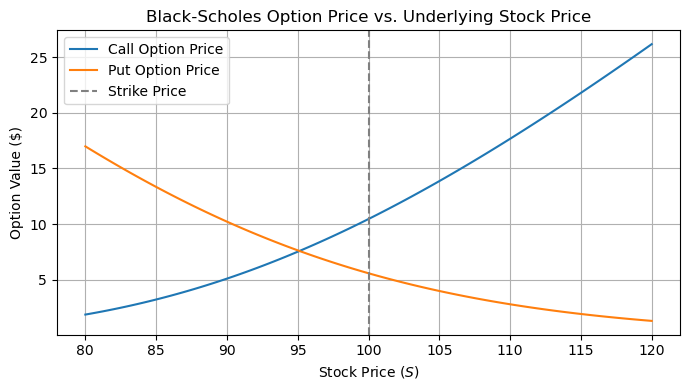

In [6]:
import numpy as np
import matplotlib.pyplot as plt

S_range = np.linspace(80, 120, 100)
call_prices = [black_scholes_call(S, K, T, r, sigma) for S in S_range]
put_prices = [black_scholes_put(S, K, T, r, sigma) for S in S_range]

plt.figure(figsize=(7,4))
plt.plot(S_range, call_prices, label="Call Option Price")
plt.plot(S_range, put_prices, label="Put Option Price")
plt.axvline(x=K, color='gray', linestyle='--', label='Strike Price')
plt.xlabel('Stock Price ($S$)')
plt.ylabel('Option Value ($)')
plt.title('Black-Scholes Option Price vs. Underlying Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()